In [51]:
import pandas as pd#載入pandas套件 命名引用名稱:pd
import numpy as np#提供數學運算、矩陣運算等功能
import matplotlib.pyplot as plt#資料視覺化
import seaborn as sns#資料視覺化
import plotly.express as px#提供互動式的圖表

In [52]:
rowdata = pd.read_csv('E:\diabetes.csv')#讀入csv檔，並把資料命名為'rowdata'
rowdata.head(10)#show出前10筆資料

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [53]:
rowdata.dtypes#查看資料集內的特徵資料型態

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [54]:
#確認outcome分組數量
Count=rowdata.groupby(["Outcome"],as_index=False)["Outcome"].agg({"cnt":"count"})
print(Count)

   Outcome  cnt
0        0  500
1        1  268


In [55]:
#將不應該為0的數值改為nan
rowdata['Glucose'] = rowdata['Glucose'].replace({0: np.nan, 0.0: np.nan})
rowdata['BloodPressure'] = rowdata['BloodPressure'].replace({0: np.nan, 0.0: np.nan})
rowdata['SkinThickness'] = rowdata['SkinThickness'].replace({0: np.nan, 0.0: np.nan})
rowdata['Insulin'] = rowdata['Insulin'].replace({0: np.nan, 0.0: np.nan})
rowdata['BMI'] = rowdata['BMI'].replace({0: np.nan, 0.0: np.nan})

#檢查缺失值數量
rowdata.isnull().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [56]:
#本次直接移除有缺值的欄位
rowdata.dropna(
    axis=0,#axis=0: 對行進行操作;axis=1: 對列進行操作
    how='any',#'any':只要存在 NaN 就 drop 掉; 'all': 必須全部是 NaN 才 drop
    inplace=True)#是否在原資料上操作。如果為真，返回None否則返回新的copy，去掉了缺失值

data = rowdata.reset_index(drop=True)#刪除'列'資料後，需要reset資料的索引index

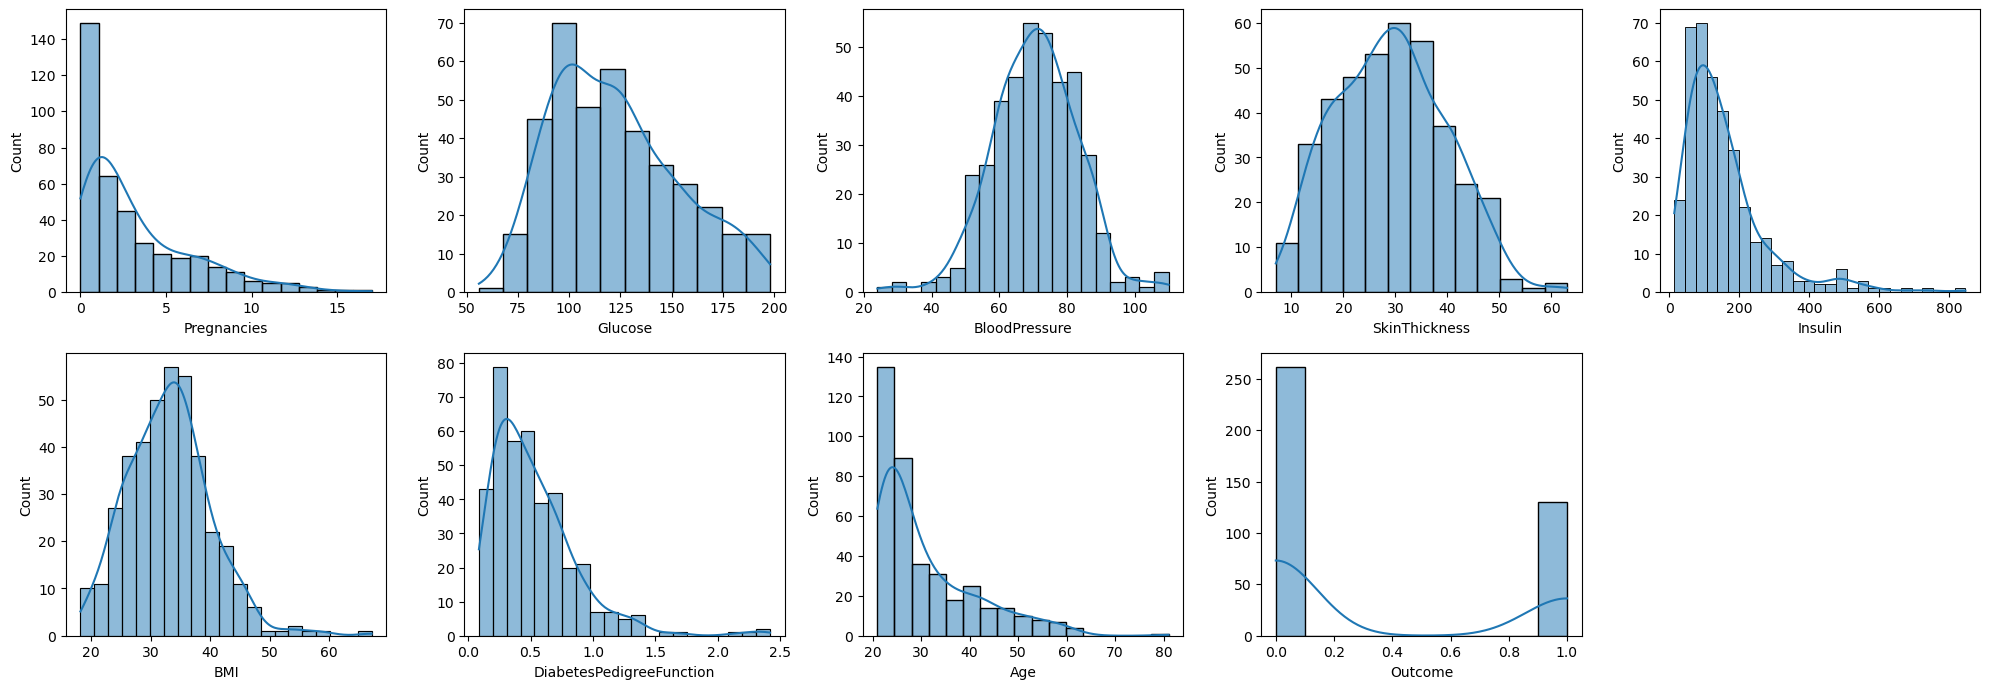

In [57]:
#紀錄資料型態不是object的數量
num_cols=[col for col in rowdata.columns if rowdata[col].dtype!='object']

#畫出分佈圖
plt.figure(figsize=(20,10))
plot_number=1
for column in num_cols:
    if plot_number <=14:
        ax=plt.subplot(3,5,plot_number)
        sns.histplot(rowdata[column], kde=True)
        plt.xlabel(column)
        
    plot_number+=1
plt.tight_layout()
plt.show()

In [58]:
#校正資料型態(要把資料型態校正回正確的資料型態)
data.dtypes #查看整份資料所有欄位資料型態

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [59]:
data.Outcome.unique()#確認預測目標資料型態為整數(int)：1,0

array([0, 1], dtype=int64)

In [60]:
#定義畫圖的function
def violin(col):
    fig=px.violin(rowdata,y=col,x="Outcome",color="Outcome",box=True,template='plotly_dark')
    return fig.show()

def kde(col):
    grid=sns.FacetGrid(rowdata,hue="Outcome",height=6,aspect=2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()

def scatter(col1,col2):
    fig=px.scatter(rowdata,x=col1,y=col2,color="Outcome",template='plotly_dark')
    return fig.show()

In [61]:
violin('BMI')#繪製提琴圖，觀察'BMI'與'是否有糖尿病'高低關係

In [62]:
violin('Insulin')#繪製提琴圖，觀察'Insulin'與'是否有糖尿病'高低關係

In [63]:
violin('Age')#繪製提琴圖，觀察'Age'與'是否有糖尿病'高低關係

In [64]:
violin('BloodPressure')#繪製提琴圖，觀察'BloodPressure'與'是否有糖尿病'高低關係

In [65]:
violin('Glucose')#繪製提琴圖，觀察'Glucose'與'是否有糖尿病'高低關係

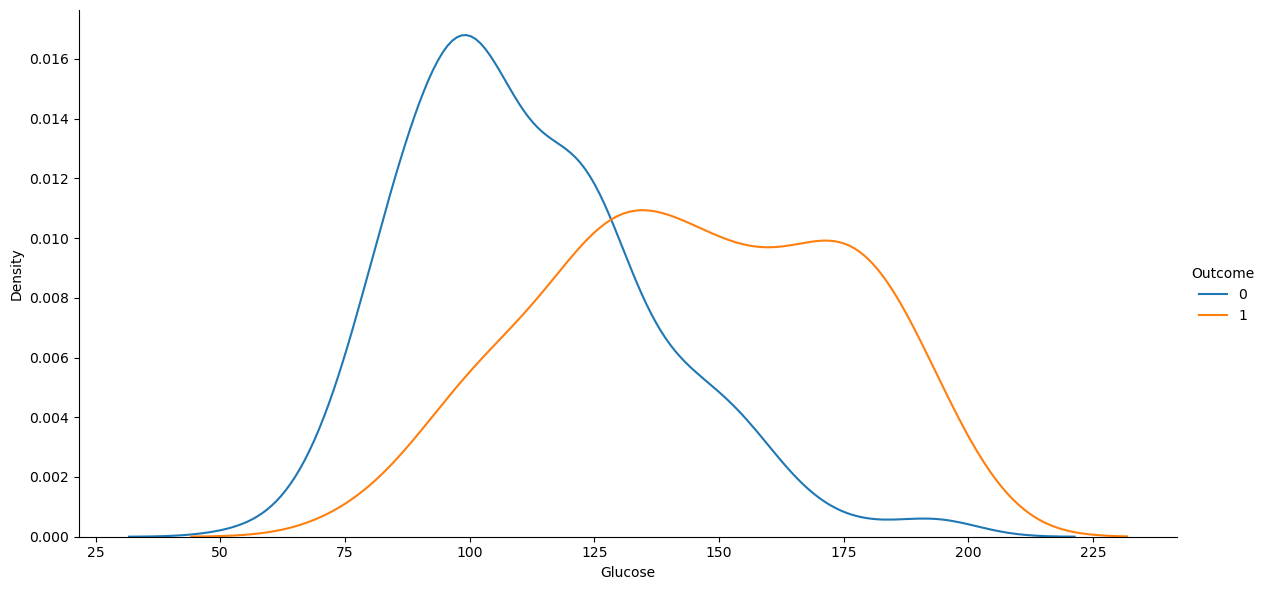

In [66]:
kde('Glucose')#觀察'Glucose'與'是否有糖尿病'高低關係

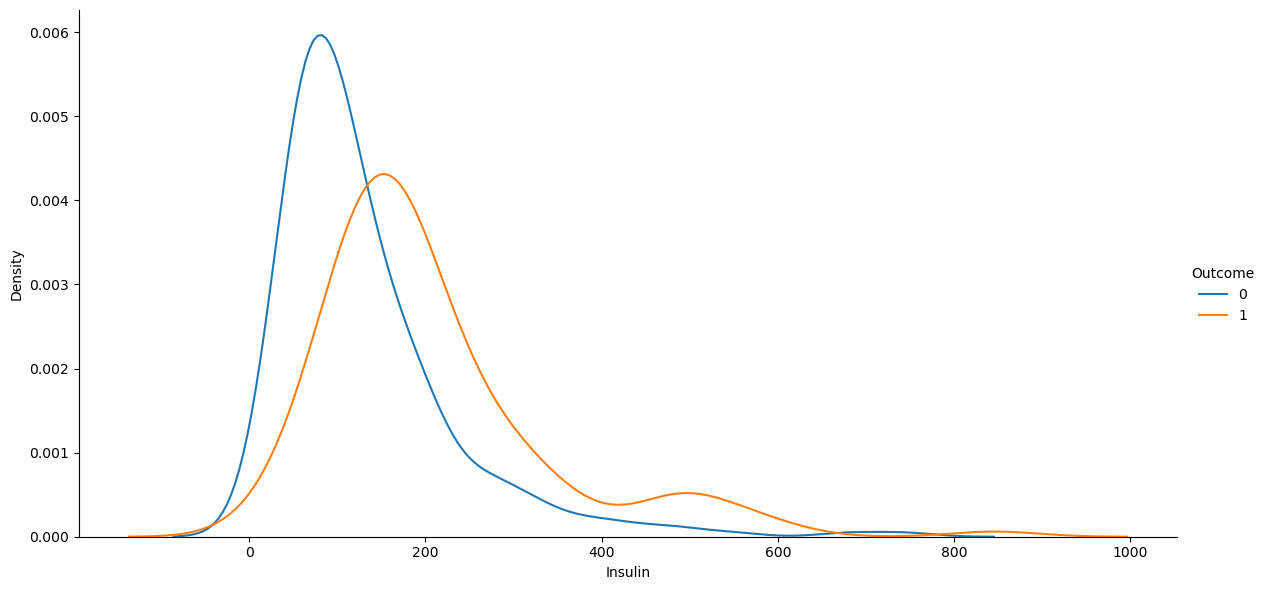

In [67]:
kde('Insulin')#觀察'Insulin'與'是否有糖尿病'高低關係

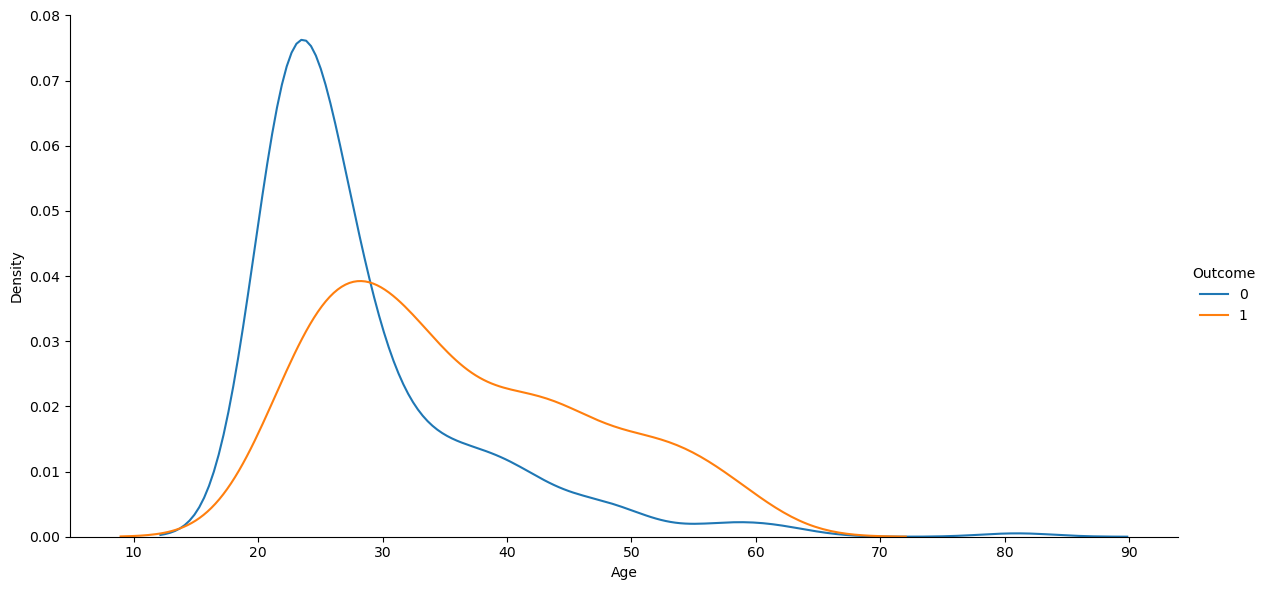

In [68]:
kde('Age')#觀察'Age'與'是否有糖尿病'高低關係

In [69]:
scatter('Insulin','Glucose')#繪製散佈圖,觀察'Insulin'與'血糖'高低關係

In [70]:
scatter('BMI','Glucose')#繪製散佈圖,觀察'BMI'與'血糖'高低關係

In [71]:
scatter('DiabetesPedigreeFunction','Glucose')#繪製散佈圖,觀察'DiabetesPedigreeFunction'與'血糖'高低關係

In [72]:
scatter('SkinThickness','BMI')#繪製散佈圖,觀察'SkinThickness'與'BMI'高低關係

In [ ]:
#由圖表可知:1.較多人血糖高且患有糖尿病，可見血糖和是否有糖尿病有關聯性  2.較多人年齡30歲以上才罹患糖尿病

In [73]:
#校正文字型態資料進行編碼
data.head(5)#查看各個特徵欄位前五筆資料

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [74]:
data_one_hot = pd.get_dummies(data)#將One-hot-encoding處理的dataframe資料命名為data_one_hot
data_one_hot.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [20]:
#將移除Outcome(預測目標)的剩餘欄位命名為clear_data
clear_data = data_one_hot.drop(['Outcome'],axis=1)

#將Outcome(預測目標)欄位命名為 label
label = data_one_hot['Outcome']

clear_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [21]:
x_features = data_one_hot.iloc[:,:-1]#從清整後的training data拆出features
y_label = data_one_hot.iloc[:,-1]#從清整後的training data拆出label
x_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,0.222,26
388,1,128.0,88.0,39.0,110.0,36.5,1.057,37
389,2,88.0,58.0,26.0,16.0,28.4,0.766,22
390,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [22]:
from sklearn.model_selection import KFold#用k-fold來做所以import python KFold的函式

In [43]:
#定義K折交叉驗證
kf = KFold(n_splits=5,shuffle=True, random_state=25)#sample random 分成5個子集，random_state設為25

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
#線性回歸
model = LinearRegression()

In [46]:
#執行K-fold交叉驗證
test_bias = []
test_variance = []
train_errors = []
test_errors = []

for train_index, test_index in kf.split(x_features):
    
    #拆分數據集為訓練集和測試集
    X_train, y_train = x_features.iloc[train_index], y_label[train_index]
    X_test, y_test = x_features.iloc[test_index], y_label[test_index]
    
    #訓練模型
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)#預測訓練集資料
    y_test_pred = model.predict(X_test)#預測測試集資料
    
    #計算偏差Bias和變異性Variance
    bias = np.sum((y_test_pred - np.mean(y_test)) ** 2) / len(y_test_pred)
    variance = np.sum((y_test_pred - np.mean(y_test_pred)) ** 2) / len(y_test_pred)
    
    test_bias.append(bias)
    test_variance.append(variance)
    
    #計算訓練和測試的誤差
    train_error = np.sum((y_train_pred - y_train) ** 2) / len(y_train_pred)
    test_error = np.sum((y_test_pred - y_test) ** 2) / len(y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

In [47]:
#輸出bias and variance
print("Bias:",test_bias)
print("Variance:",test_variance)

#輸出平均訓練和測試誤差
print("平均訓練誤差 :", sum(train_errors) / len(train_errors))
print("平均測試誤差 :", sum(test_errors) / len(test_errors))

Bias: [0.07782877503661248, 0.06596546690006339, 0.08747250350054499, 0.10677635818873575, 0.053049789476170374]
Variance: [0.07775928653821203, 0.06573767562118928, 0.08313978331108927, 0.1044069477005606, 0.05096188512103919]
平均訓練誤差 : 0.14408555636644133
平均測試誤差 : 0.15357047175482597
